In [10]:
import numpy as np
import pandas as pd

hour_dataset = pd.read_csv('./hour.csv')
# hour_dataset.info()
hour_dataset.head()




,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


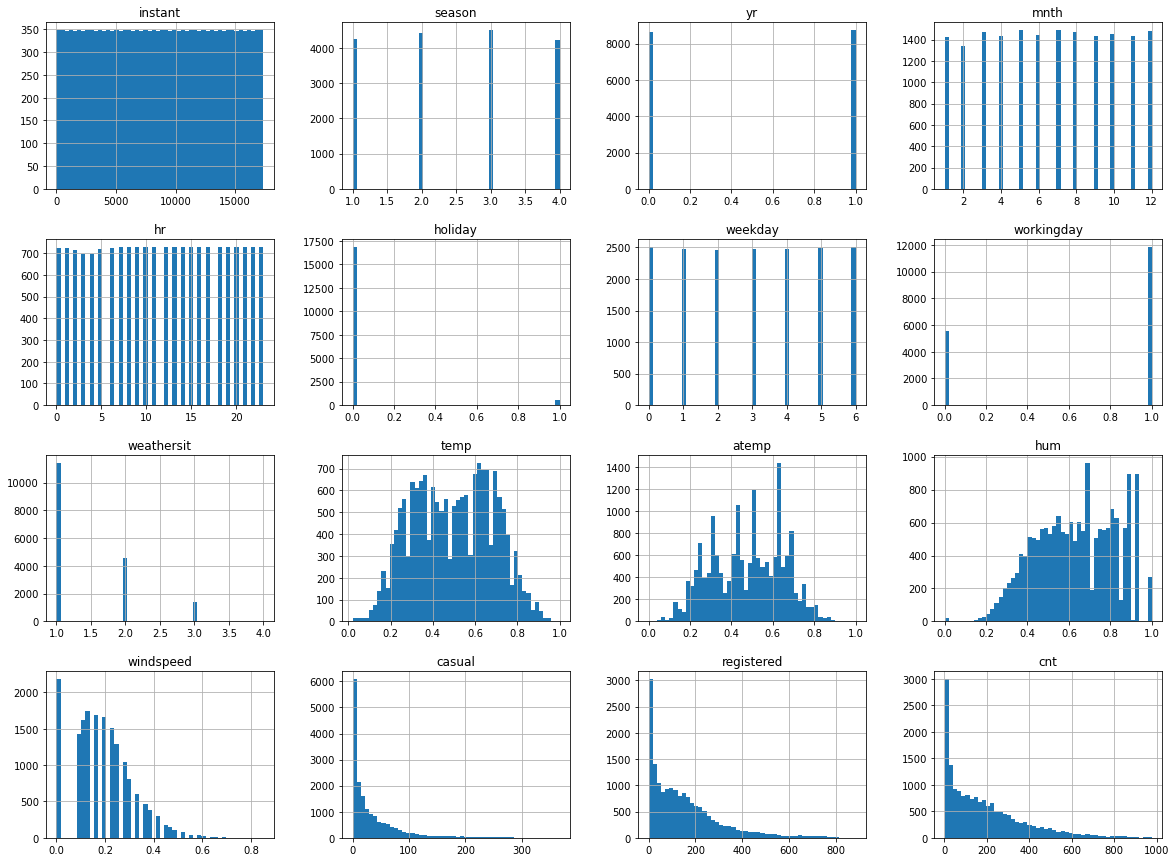

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# for Jupyter Notebooks ^ This is needed to display plots within the notebook
hour_dataset.hist(bins=50, figsize=(20, 15))
plt.show()


In [12]:
corr_matrix = hour_dataset.corr()
corr_matrix["cnt"].sort_values(ascending=False)


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

# Notable variables
* temp
* atemp
* hum
* season
* hr
* weathersit

array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='atemp', ylabel='temp'>,
        <AxesSubplot:xlabel='hum', ylabel='temp'>,
        <AxesSubplot:xlabel='season', ylabel='temp'>,
        <AxesSubplot:xlabel='hr', ylabel='temp'>,
        <AxesSubplot:xlabel='weathersit', ylabel='temp'>,
        <AxesSubplot:xlabel='cnt', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='atemp'>,
        <AxesSubplot:xlabel='atemp', ylabel='atemp'>,
        <AxesSubplot:xlabel='hum', ylabel='atemp'>,
        <AxesSubplot:xlabel='season', ylabel='atemp'>,
        <AxesSubplot:xlabel='hr', ylabel='atemp'>,
        <AxesSubplot:xlabel='weathersit', ylabel='atemp'>,
        <AxesSubplot:xlabel='cnt', ylabel='atemp'>],
       [<AxesSubplot:xlabel='temp', ylabel='hum'>,
        <AxesSubplot:xlabel='atemp', ylabel='hum'>,
        <AxesSubplot:xlabel='hum', ylabel='hum'>,
        <AxesSubplot:xlabel='season', ylabel='hum'>,
        <AxesSubplot:xlabel='hr', ylabel='hum'>

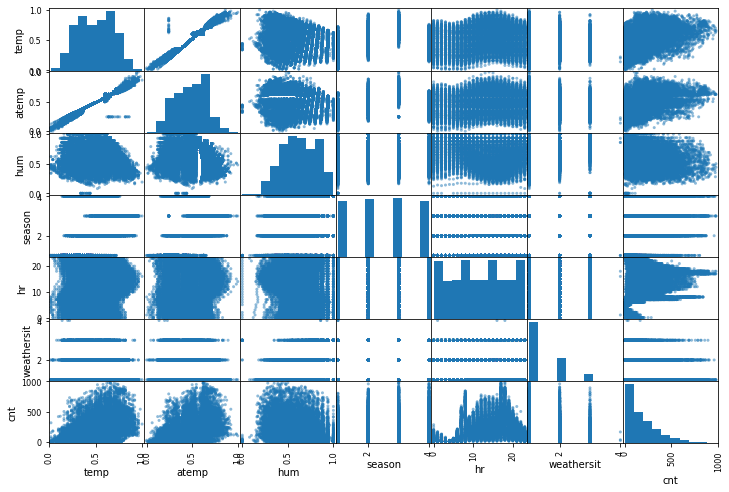

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["temp", "atemp", "hum", "season", "hr", "weathersit", "cnt"]
scatter_matrix(hour_dataset[attributes], figsize=(12, 8))


## Notable findings
* about 10am and 6pm are the most bust times of the day

<AxesSubplot:xlabel='temp', ylabel='cnt'>

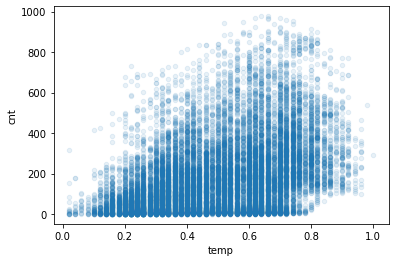

In [17]:
hour_dataset.plot(kind="scatter", x="temp", y="cnt",
             alpha=0.1)

In [48]:
weather = hour_dataset[['weathersit']]
season = hour_dataset[['season']]
# one-hot encode weathersit with skilearn one hot encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
weather_ohe = cat_encoder.fit_transform(weather)
weather_ohe = pd.DataFrame(weather_ohe)
weather_ohe.columns = cat_encoder.get_feature_names(['weathersit'])


season_ohe = pd.DataFrame(cat_encoder.fit_transform(season))
season_ohe.columns = cat_encoder.get_feature_names(['season_ohe'])


In [50]:
newdf = hour_dataset[['temp', 'atemp', 'hum', 'hr', 'cnt']]

# add the one-hot encoded weathersit to the new dataframe
newdf = pd.concat([newdf, weather_ohe], axis=1)
# add the one-hot encoded season to the new dataframe
newdf = pd.concat([newdf, season_ohe], axis=1)

newdf

,temp,atemp,hum,hr,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_ohe_1,season_ohe_2,season_ohe_3,season_ohe_4
0,0.24,0.2879,0.81,0,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.22,0.2727,0.80,1,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.22,0.2727,0.80,2,32,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.24,0.2879,0.75,3,13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.24,0.2879,0.75,4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,19,119,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17375,0.26,0.2576,0.60,20,89,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17376,0.26,0.2576,0.60,21,90,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17377,0.26,0.2727,0.56,22,61,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(newdf, hour_dataset['cnt'])


LinearRegression()

In [ ]:
some_data = newdf.iloc[:5]
some_labels = newdf.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))